In [1]:
import numpy as np
import pandas as pd

#描画系
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#複数ページをPDF保存する際に必要なmodule
from matplotlib.backends.backend_pdf import PdfPages

#計算系のもの
import re
import math

In [2]:
fbgn_anno_master =pd.read_csv("./fbgn_annotation_master.csv")
N_peak = pd.read_csv("./N_peak_pro_FBgn.csv")
pausing_index = pd.read_csv("./Promoter_pause_2011.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13,14,15,16,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#idが一意、FBgnはprimaryのみ
id_to_gn={}
for index, row in fbgn_anno_master.iterrows():
    id_num = row["num_id"]
    
    id_to_gn[row["annotation_ID"]]=row["primary_FBgn#"]
    for i in range(id_num):
        id_to_gn[row["secondary_annotation_ID_"+str(i+1)]]=row["primary_FBgn#"]
        
#FBgnが一意、ID(CG~)はprimaryのみ
gn_to_id={}
for index, row in fbgn_anno_master.iterrows():
    gn_num = row["num_gn"]
    
    gn_to_id[row["primary_FBgn#"]]=row["annotation_ID"]
    for i in range(gn_num):
        gn_to_id[row["secondary_FBgn#"+str(i+1)]]=row["annotation_ID"]

In [4]:
pausing_index.head()

,Geneid,Chr,Start,End,Strand,Length,TSS,Length.1,genebody,TSS per kb,gb per kb,Pause index
0,FBgn0031344,2L,1502654,1503154,-,501,593,1121,1,1183.632730,0.892061,1326.852300
1,FBgn0259714,2L,6411076,6411576,-,501,3650,32556,188,7285.429140,5.774665,1261.619310
2,FBgn0029840,X,6089951,6090451,-,501,280,6568,3,558.882236,0.456760,1223.579510
3,FBgn0041087,2R,9414092,9414592,+,501,2496,2505,13,4982.035930,5.189621,960.000000
4,FBgn0038156,3R,13450340,13450840,+,501,1458,12595,39,2910.179640,3.096467,939.838784


In [5]:
pausing_index.shape

(8468, 12)

pausing distributionを変形して行く。
それぞれのgene_idをprimaryに標準化+それぞれの条件でpausing indexを計算

In [6]:
pausing_index["Geneid_norm"]=pausing_index["Geneid"].apply(lambda name:id_to_gn.get(gn_to_id.get(name,"Error"),"Error"))

In [7]:
pausing_index.head()

,Geneid,Chr,Start,End,Strand,Length,TSS,Length.1,genebody,TSS per kb,gb per kb,Pause index,Geneid_norm
0,FBgn0031344,2L,1502654,1503154,-,501,593,1121,1,1183.632730,0.892061,1326.852300,FBgn0031344
1,FBgn0259714,2L,6411076,6411576,-,501,3650,32556,188,7285.429140,5.774665,1261.619310,FBgn0259714
2,FBgn0029840,X,6089951,6090451,-,501,280,6568,3,558.882236,0.456760,1223.579510,FBgn0029840
3,FBgn0041087,2R,9414092,9414592,+,501,2496,2505,13,4982.035930,5.189621,960.000000,FBgn0041087
4,FBgn0038156,3R,13450340,13450840,+,501,1458,12595,39,2910.179640,3.096467,939.838784,FBgn0038156


In [8]:
#変換がおかしくなった物を抽出
pausing_index[pausing_index["Geneid_norm"]=="Error"]

,Geneid,Chr,Start,End,Strand,Length,TSS,Length.1,genebody,TSS per kb,gb per kb,Pause index,Geneid_norm


pausing indexを計算、

In [9]:
pausing_index["Pause index_log2"]=pausing_index["Pause index"].apply(lambda x:np.log2(x))

<AxesSubplot:xlabel='Pause index', ylabel='Count'>

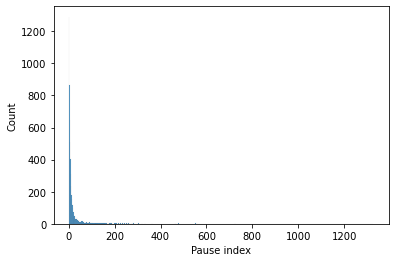

In [10]:
sns.histplot(pausing_index[pausing_index["Pause index"]>1]["Pause index"])

In [11]:
pausing_index.head()

,Geneid,Chr,Start,End,Strand,Length,TSS,Length.1,genebody,TSS per kb,gb per kb,Pause index,Geneid_norm,Pause index_log2
0,FBgn0031344,2L,1502654,1503154,-,501,593,1121,1,1183.632730,0.892061,1326.852300,FBgn0031344,10.373792
1,FBgn0259714,2L,6411076,6411576,-,501,3650,32556,188,7285.429140,5.774665,1261.619310,FBgn0259714,10.301061
2,FBgn0029840,X,6089951,6090451,-,501,280,6568,3,558.882236,0.456760,1223.579510,FBgn0029840,10.256892
3,FBgn0041087,2R,9414092,9414592,+,501,2496,2505,13,4982.035930,5.189621,960.000000,FBgn0041087,9.906891
4,FBgn0038156,3R,13450340,13450840,+,501,1458,12595,39,2910.179640,3.096467,939.838784,FBgn0038156,9.876269


In [12]:
#Nan,Infを削除+pause indexが1以上の物を抽出
pausing_index.replace([np.inf, -np.inf], np.nan)
pausing_index_clean = pausing_index[pausing_index["Pause index"]>1]

pausing_index_clean = pausing_index_clean.dropna(subset=["Pause index","Pause index_log2"])
pausing_index_clean = pausing_index_clean.drop_duplicates(["Geneid_norm"],keep="last")

pausing_index_clean = pausing_index_clean.set_index("Geneid_norm")

In [13]:
pausing_index_clean.head()

,Geneid,Chr,Start,End,Strand,Length,TSS,Length.1,genebody,TSS per kb,gb per kb,Pause index,Pause index_log2
Geneid_norm,,,,,,,,,,,,,
FBgn0031344,FBgn0031344,2L,1502654,1503154,-,501,593,1121,1,1183.632730,0.892061,1326.852300,10.373792
FBgn0259714,FBgn0259714,2L,6411076,6411576,-,501,3650,32556,188,7285.429140,5.774665,1261.619310,10.301061
FBgn0029840,FBgn0029840,X,6089951,6090451,-,501,280,6568,3,558.882236,0.456760,1223.579510,10.256892
FBgn0041087,FBgn0041087,2R,9414092,9414592,+,501,2496,2505,13,4982.035930,5.189621,960.000000,9.906891
FBgn0038156,FBgn0038156,3R,13450340,13450840,+,501,1458,12595,39,2910.179640,3.096467,939.838784,9.876269


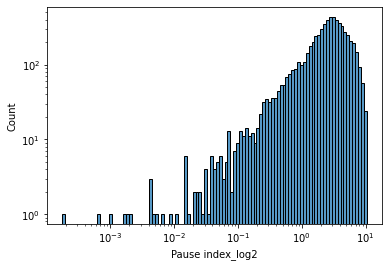

In [14]:
sns.histplot(pausing_index_clean["Pause index_log2"],log_scale=(True, True))
plt.show()

In [15]:
N_peak.head()

,Unnamed: 0,PeakID (cmd=annotatePeaks.pl peakcall_strict/Ty-N_summits.bed dm6 -annStats peak_annotation/Ty-N_stats.txt),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,...,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type,CG_number,FBgn_ID
0,1,Ty-N_peak_771,chr3R,9868709,9868709,+,423.84717,NaN,promoter-TSS (NM_141702),promoter-TSS (NM_141702),...,41215,Dm.4348,NM_141702,NaN,Teh1,CG12806|Dmel\CG12806|TEH1,tipE homolog 1,protein-coding,CG12806,FBgn0037766
1,6,Ty-N_peak_246,chr2R,6610404,6610404,+,387.40909,NaN,promoter-TSS (NM_001103729),promoter-TSS (NM_001103729),...,35555,Dm.5288,NM_136371,NaN,jing,1.28|AEBP2|CG9397|CG9403|CT9093|Dmel\CG9397|Dm...,jing,protein-coding,CG9397,FBgn0086655
2,8,Ty-N_peak_1185,chrX,16063550,16063550,+,383.21976,NaN,promoter-TSS (NM_132874),promoter-TSS (NM_132874),...,32572,Dm.17381,NM_132874,NaN,dpr18,CG14948|CT34788|Dmel\CG14948|Dpr-18|Dpr18,defective proboscis extension response 18,protein-coding,CG14948,FBgn0030723
3,14,Ty-N_peak_881,chr3R,24057437,24057437,+,360.97940,NaN,promoter-TSS (NM_142954),promoter-TSS (NM_142954),...,42852,Dm.23337,NM_079750,NaN,Hsp68,68|CG5436|DmHsp68|Dmel\CG5436|HSP68|HSP68_DROM...,Heat shock protein 68,protein-coding,CG5436,FBgn0001230
4,16,Ty-N_peak_1086,chrX,3835566,3835566,+,352.65277,NaN,promoter-TSS (NM_166992),promoter-TSS (NM_166992),...,31339,Dm.17730,NM_130722,NaN,ec,CG2904|Dmel\CG2904|EG:EG0002.3|Ec|Q1W9Q0,echinus,protein-coding,CG2904,FBgn0000542


In [16]:
pausing_index_clean.head()

,Geneid,Chr,Start,End,Strand,Length,TSS,Length.1,genebody,TSS per kb,gb per kb,Pause index,Pause index_log2
Geneid_norm,,,,,,,,,,,,,
FBgn0031344,FBgn0031344,2L,1502654,1503154,-,501,593,1121,1,1183.632730,0.892061,1326.852300,10.373792
FBgn0259714,FBgn0259714,2L,6411076,6411576,-,501,3650,32556,188,7285.429140,5.774665,1261.619310,10.301061
FBgn0029840,FBgn0029840,X,6089951,6090451,-,501,280,6568,3,558.882236,0.456760,1223.579510,10.256892
FBgn0041087,FBgn0041087,2R,9414092,9414592,+,501,2496,2505,13,4982.035930,5.189621,960.000000,9.906891
FBgn0038156,FBgn0038156,3R,13450340,13450840,+,501,1458,12595,39,2910.179640,3.096467,939.838784,9.876269


In [17]:
N_peak["Pause index"] = N_peak["FBgn_ID"].apply(lambda name:pausing_index_clean.at[name,"Pause index"] if name in pausing_index_clean.index else np.nan)
N_peak["Pause index_log2"] = N_peak["FBgn_ID"].apply(lambda name:pausing_index_clean.at[name,"Pause index_log2"] if name in pausing_index_clean.index else np.nan)
N_peak["Pause index"] = N_peak["Pause index"].astype("float64")
N_peak["Pause index_log2"] = N_peak["Pause index_log2"].astype("float64")
    
N_peak.shape

(527, 24)

In [18]:
N_peak.replace([np.inf, -np.inf], np.nan)
N_peak_clean = N_peak.dropna(subset=["Pause index","Pause index_log2"])
N_peak_clean.to_csv("./N_peak_clean.csv")


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


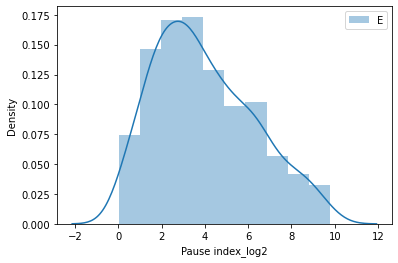

In [19]:
sns.distplot(N_peak_clean["Pause index_log2"],label='E')

plt.legend()
plt.show()

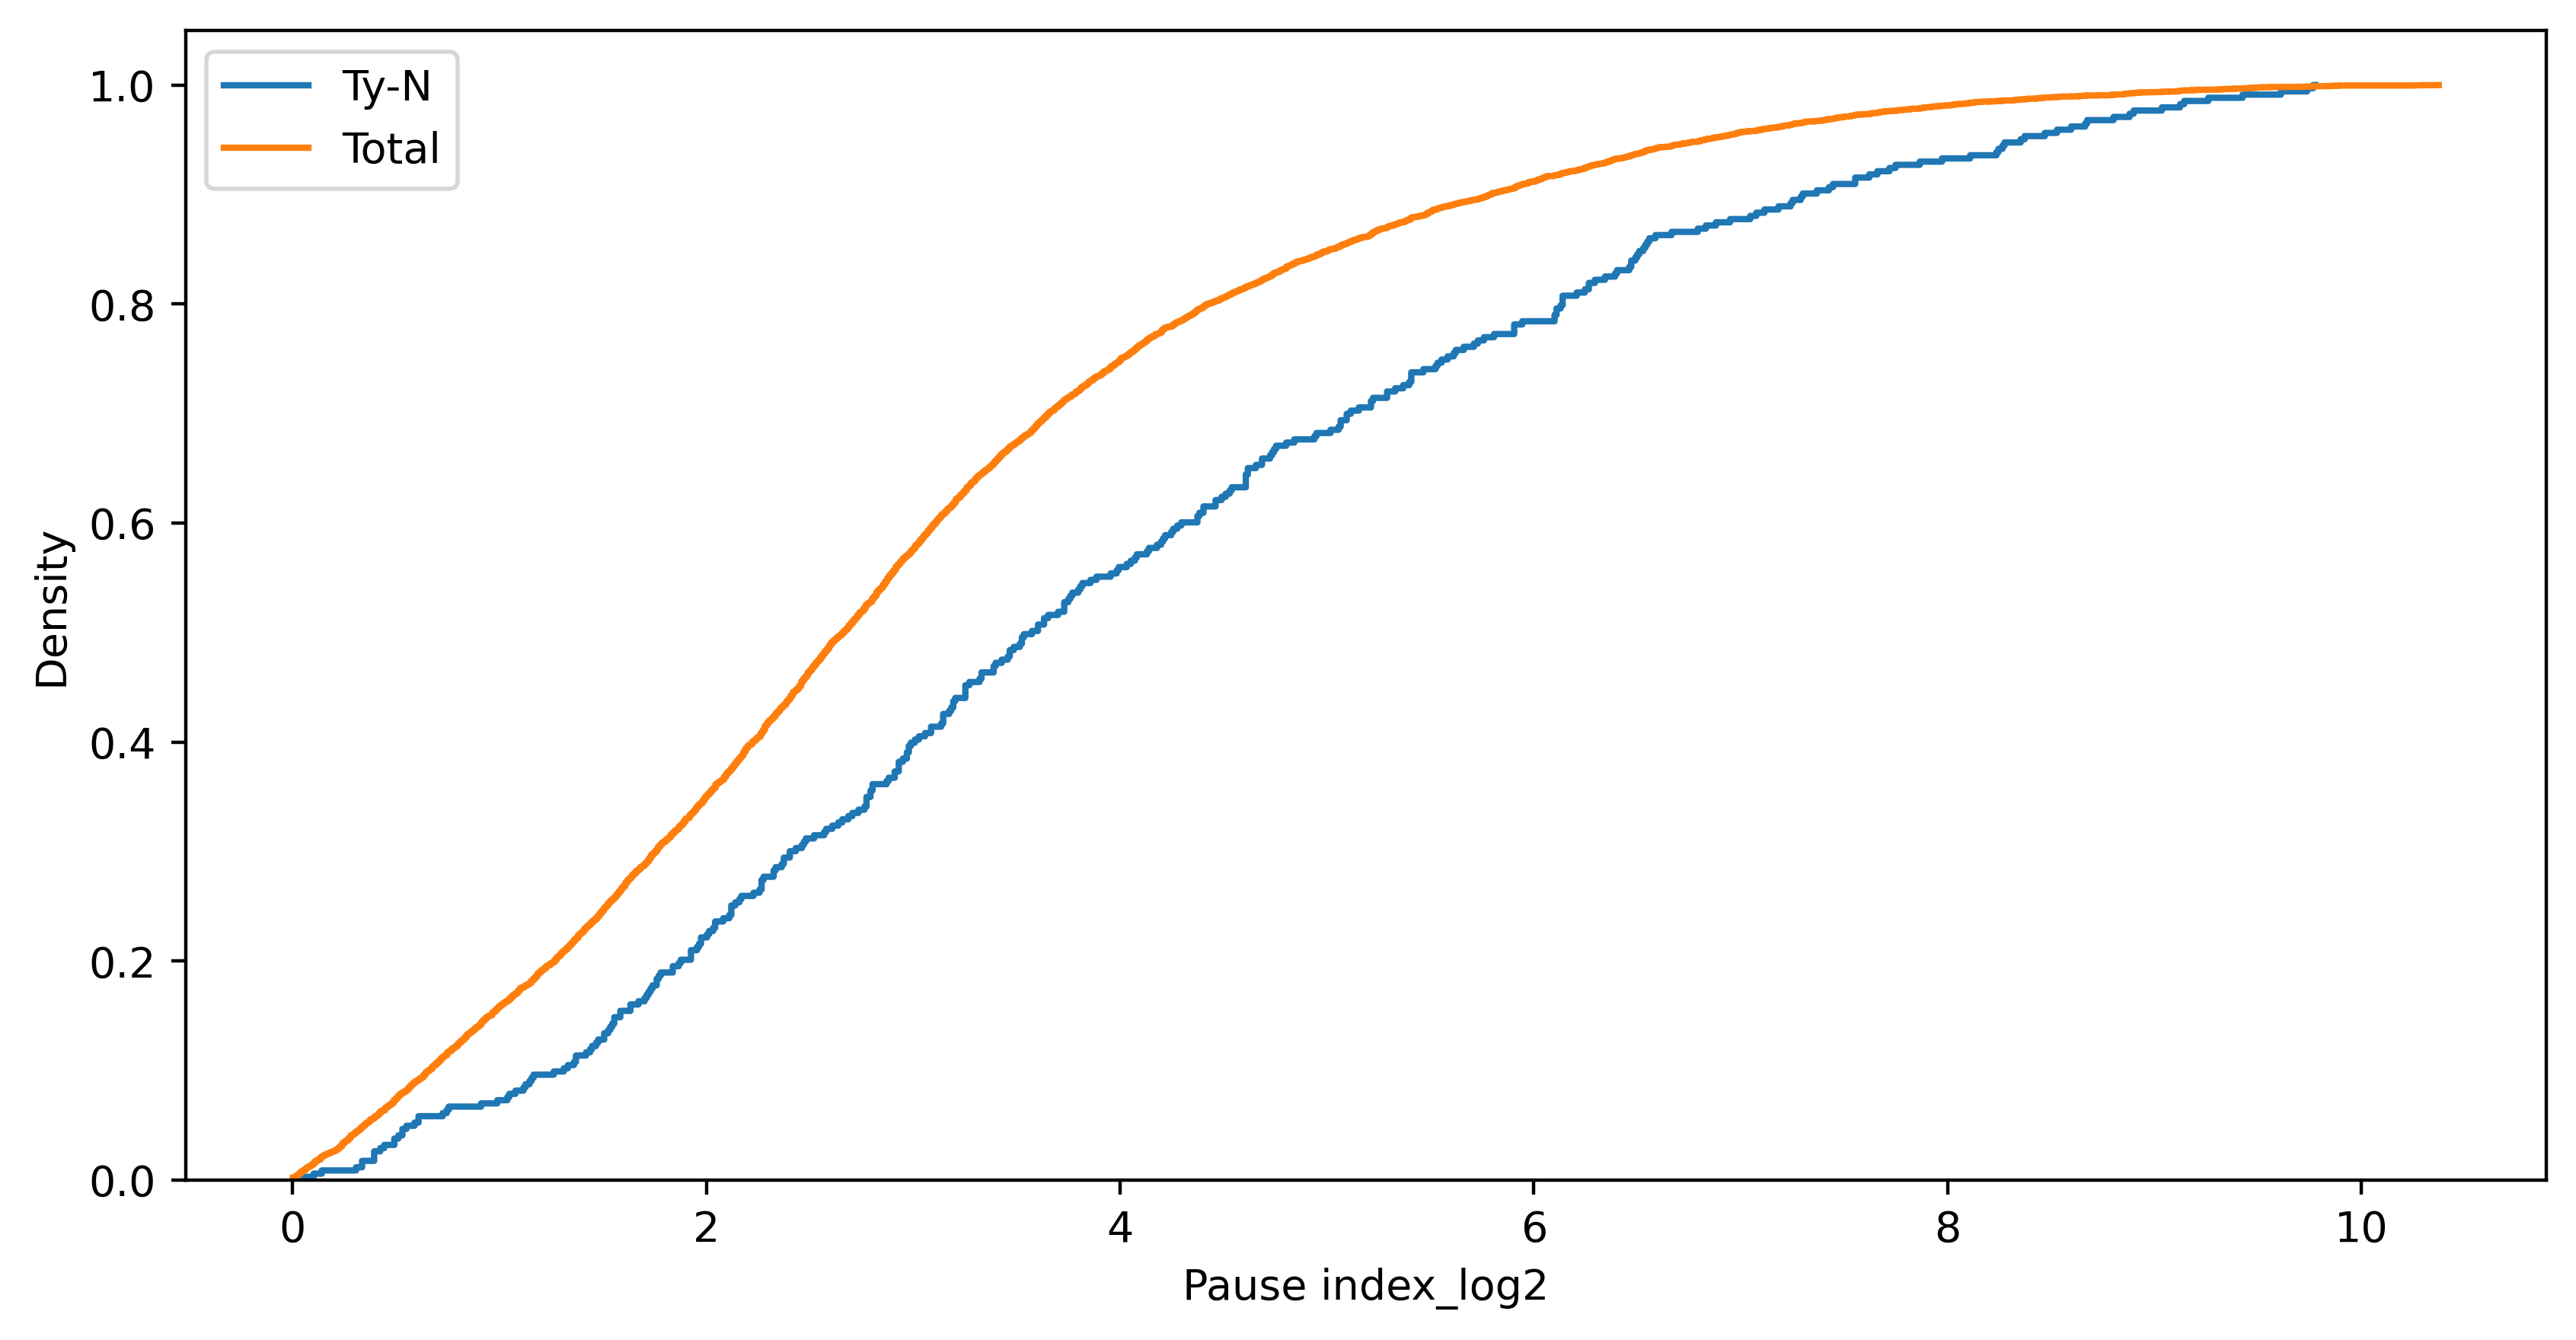

In [20]:
fig = plt.figure(figsize=(10, 5),dpi=400)
sns.histplot(N_peak_clean["Pause index_log2"],label='Ty-N',cumulative=True, element="step", fill=False,stat="density",bins=1000)
sns.histplot(pausing_index_clean["Pause index_log2"],label='Total',cumulative=True, element="step", fill=False,stat="density",bins=1000)

plt.legend()
plt.show()
fig.savefig("../pic/cumulative_2011.pdf",transparent=True)

In [21]:
from scipy import stats
from scipy.stats import mannwhitneyu

In [22]:
TyN_list = N_peak_clean["Pause index"].values
Total_list = pausing_index_clean["Pause index"].values

In [23]:
u,pval = mannwhitneyu(TyN_list,Total_list,alternative='greater')
print('u=',u)
print('p=',pval)

u= 1376743.5
p= 4.763000363351838e-16


In [24]:
s,pval = stats.kstest(TyN_list,Total_list)

In [27]:
print('stat=',s)
print('p=',pval)

stat= 0.1955617198335645
p= 2.219202599462733e-11
